#  <h style="font-family:Times New Roman;"><strong> <font color=#2d2d86><center>Least Square based approach for Signal Denoising</center></font></strong></h>


<p>One approach to denoise the signal is based on <strong>least squares weighted regularization</strong>. The smoothness of a signal can be measured by the energy of its derivative (second order derivative(<B>D</B>)). The smoother a signal is, the smaller the energy of its derivative is.</p>

<p> Objective is to denoise the signal without loosing the orignal signal charecteristics.</p>

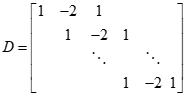

<p>
<strong>D</strong> is the second order difference matrix with <strong>diagonal loadings</strong>.Therefore, solution is obtained using fast solvers for banded systems.</p>

${\displaystyle {\underset {x}{\operatorname {arg\,min} }}\,\|y-x\|^{2}_2+\lambda \|Dx\|^{2}_{2}}$
<p>
${\begin{aligned}{\mathit  {\frac{df(x,y)}{dx}}}&= -y + (I+\lambda D^{T}D)x =0 \\ & x=(I+\lambda D^{T}D)^{-1}y \end{aligned}}$

</p>
<p>
    <strong>Signal to Noise Ratio:</strong>Computed as mentioned below

${\mathrm  {SNR_{{dB}}}}=10\log _{{10}}\left({\frac  {P_{{\mathrm  {signal}}}}{P_{{\mathrm  {noise}}}}}\right)$

${\mathrm  {SNR_{{dB}}}}=10\log _{{10}}\left({\frac  {rms(AVG_{{\mathrm  {signal}})}}{rms(AVG_{{\mathrm  {noise}}})}}\right)$</p>
<p>
    <strong>Peak signal to noise ratio:</strong>Computed as mentioned below

${\begin{aligned}{\mathit  {PSNR}}&=10* \log _{{10}}\left({\frac  {{\mathit  {MAX}}_{I}^{2}}{{\mathit  {MSE}}}}\right)\\&10* \log _{{10}}\left({\frac  {{\mathit  {MAX}}_{I}^{2}}{{\sqrt  {{\mathit  {MSE}}}}}}\right)\\&20* \log _{{10}}\left({{\mathit  {MAX}}_{I}}\right)-20* \log _{{10}}\left({{{\sqrt  {{\mathit  {MSE}}}}}}\right)\end{aligned}}$</p>



<p style="font-family:Georgia"><B style ="font-family:Arial">Q1.</B> In the least square based signal denoising, change the control parameter from 0 to 1 with the step
size =0.1 and evaluate the performance of the algorithm using PSNR and SNR. Plot the variation of PSNR and SNR
with the control parameter.</p>

<B>Justification:</B>
<p><li>Effectiveness of Denoised signal to be smooth and similar to Orignal /reference signal is traded with the varying lamda(λ) value.</li>
<li>By increasing the λ value or the control parameter with the step size, results into an exponential growth curve or higher SNR/PSNR values depending on the degree of derivative.</li> <li>It is evident from the performance of the PSNR and SNR plots that denoising technique using the <B>"least square weighted regularization"</B> reduces the noise from the orignal Noisy Signal.</li></p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from scipy.sparse import diags as spdiags
from numpy.linalg import matrix_rank as rank
from numpy.random import randn as randn
from pandas import DataFrame

In [2]:
read_file=pd.read_csv(r'data.txt',header=None)
read_file.to_csv(r'data.csv',index=None)
Orignal_Signal=pd.read_csv('data.csv')
N=len(Orignal_Signal)
Noisy_Signal=Orignal_Signal+(0.1*randn(300,1))

In [3]:
data2=np.array([1,-2,1])
data1=np.array([1,-1])

diags2=np.array([0,1,2])
diags1=np.array([0,1])

D_2=spdiags(data2,diags2,shape=(N-2,N)).toarray()
D_1=spdiags(data1,diags1,shape=(N-2,N)).toarray()



print("First five corner of Second order derivative matrix is:\n",D_2[:5,:5]) 

First five corner of Second order derivative matrix is:
 [[ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]
 [ 0.  0.  0.  0.  1.]]


In [3]:
def Min_x(Noisy_Signal,lamda,deg):
    banded_matrix = (np.identity(N))+(lamda*(deg.T@deg))
    Smooth_Signal=np.linalg.inv(banded_matrix)@Noisy_Signal
    return(Smooth_Signal)


In [4]:
def plot_Orignal():
    plt.subplot(211)
    plt.title('Orignal Signal')
    plt.plot(Orignal_Signal)
    plt.grid(True)
    plt.xlabel('Sample_Number')
    plt.ylabel('Amplitude')
    plt.show()
def plot_Noisy():
    plt.subplot(212)
    plt.title('Noisy Signal')
    plt.plot(Noisy_Signal)
    plt.grid(True)
    plt.xlabel('Sample_Number')
    plt.ylabel('Amplitude')
    plt.show()
def plot_Smooth(lamda,deg):
    Smooth_Signal=Min_x(Noisy_Signal,lamda,deg)
    plt.subplot(212)
    plt.title('Denoised Signal'+"(lamda:"+str(lamda)+')')
    plt.plot(Smooth_Signal)
    plt.grid(True)
    plt.xlabel('Sample_Number')
    plt.ylabel('Amplitude')
    plt.show()
    return Smooth_Signal

In [5]:
from math import log10,sqrt
def PSNR(Orignal,Denoised,Peak_value_signal):
    MSE=np.mean((Orignal - Denoised) ** 2)  
    if(MSE==0):
        pass 
    else:        
        psnr=20*log10(Peak_value_signal/sqrt(MSE))        
        return psnr    

In [6]:
def PSNR_Compute(deg,Orignal_Signal,Noisy_Signal):
    plot_Orignal()
    plot_Noisy() 

    L=np.arange(0,1.1,0.1)
    List=[]
    for i in L:
        Denoised_Signal=Min_x(Noisy_Signal,i,deg)   
        y=np.array(Orignal_Signal)  
        z=np.array(Denoised_Signal)
        peak_value_signal=max(y)
        PSNR_RES=PSNR(y,z,peak_value_signal)
        List.append(PSNR_RES)
      
    return L,List

In [7]:
def Performance_PSNR(D):
    L,List=PSNR_Compute(D,Orignal_Signal,Noisy_Signal)  
    plot_Smooth(1.0,D)    
    plt.subplot(211)
    plt.title('Performance')
    plt.xlabel('Lamda')
    plt.ylabel('PSNR')
    plt.plot(L,List)
    plt.grid(True)
    plt.show
    return List
   


In [8]:
def SNR(Orignal,Denoised):
    PSignal=np.sum(np.square(Orignal))/len(Orignal)
    PNoise=np.sum(np.square(Denoised-Orignal))/len(Denoised)
    snr=(10*np.log10(PSignal))-(10*np.log10(PNoise))
    return snr

In [9]:
def SNR_Compute(deg,Orignal_Signal,Noisy_Signal):
    plot_Orignal()
    plot_Noisy() 
    L=np.arange(0,1.1,0.1)
    List=[]
    for i in L:
        Denoised_Signal=Min_x(Noisy_Signal,i,deg)   
        y=np.array(Orignal_Signal)  
        z=np.array(Denoised_Signal)
        SNR_RES=SNR(y,z)
        List.append(SNR_RES)      
    return L,List

In [10]:
def Performance_SNR(D):
    L,List=SNR_Compute(D,Orignal_Signal,Noisy_Signal)  
    plot_Smooth(1.0,D)
    plt.subplot(211)
    plt.title('Performance')
    plt.xlabel('Lamda')
    plt.ylabel('SNR')
    plt.plot(L,List)
    plt.grid(True)
    plt.show
    return List

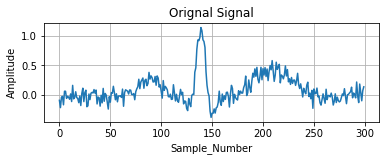

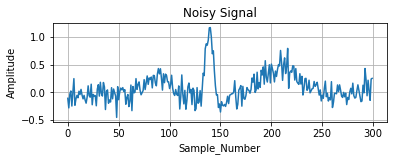

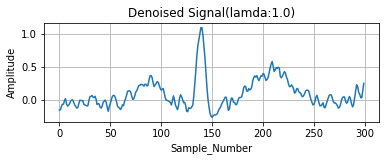

Highest PSNR value acheieved for lamda at 1.0 for 2nd order derivative is: 22.840835681917007


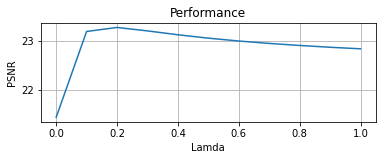

In [12]:

List1=Performance_PSNR(D_2)
print("Highest PSNR value acheieved for lamda at 1.0 for 2nd order derivative is:",List1[10])

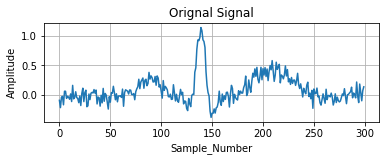

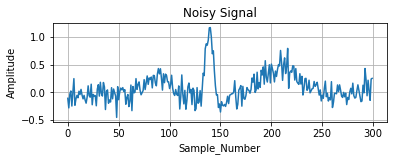

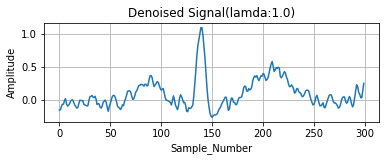

Highest SNR value acheieved for lamda at 1.0 for 2nd order derivative is: 9.648705042746206


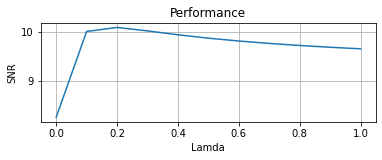

In [13]:
List1=Performance_SNR(D_2)
print("Highest SNR value acheieved for lamda at 1.0 for 2nd order derivative is:",List1[10])

<p style="font-family:Georgia"><B style ="font-family:Arial">Q2.</B> In the least square based signal denoising, change the D matrix from second-order to first-order and repeat the experiment mentioned in <B> Q.No.1.</B> Report your observations.</p>
  <p></p>
<p>
    
<B>Justification:</B>
    <li>The smoothness of the signal can be measured by the energy of its <B>derivative</B>.</li> <li>With the increase in smoothness,energy decreases and vice-versa. This can be proved with the performance of PSNR/SNR plots.</li> <li>Changing the D matrix from second-order to first-order,<B>SNR value has increased</B> from <B>9.648dB to 10.325dB</B>,which indicates that removal of noise from the orignal noisy signal gradually dropped in turn affecting the smoothness of the signal.</li>
</p>    

First five corner of First-order derivative matrix is:
 [[ 1. -1.  0.  0.  0.]
 [ 0.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  0.]
 [ 0.  0.  0.  1. -1.]
 [ 0.  0.  0.  0.  1.]]


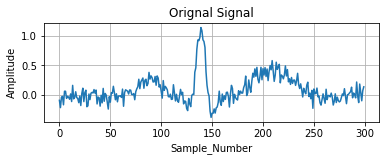

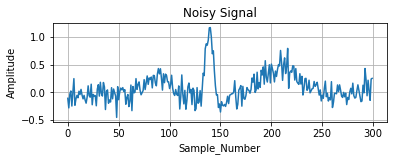

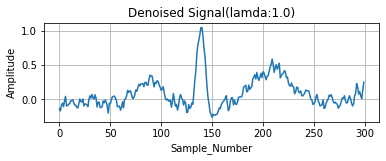

Highest SNR value acheieved for lamda at 1.0 for 1st order derivative is: 10.32579892929961


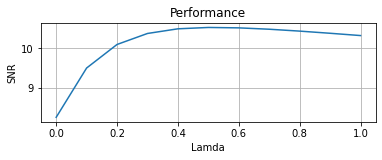

In [14]:
print("First five corner of First-order derivative matrix is:\n",D_1[:5,:5]) 
List1=Performance_SNR(D_1)
print("Highest SNR value acheieved for lamda at 1.0 for 1st order derivative is:",List1[10])

<p style="font-family:Georgia"><B style ="font-family:Arial">Q3.</B> In the least square based signal densoing, change the D matrix from second order to third order and repeat the experiment mentioned in <B>Q.No.1.</B> Report your observations. </p>
<p></p>

<p>
    
<B>Justification:</B>
    <li>Changing the matrix to higher order derivative from lower order derivative increases the smoothness in turn reducing the energy values.This also indicates <B> information loss</B>.</li>
    <li>As we see from the plots that SNR value has decreased from <B>9.648dB to 9.51dB</B> indicating the amount of noise removed from the signal and the peak value drop compared to Denoised signal of second order derivative</li>
    <li>It is widely appreciated that differentiation degrades the signal-to-noise ratio (SNR)</li>
    

First five corner of third-order derivative matrix is:
 [[ 1. -3.  3. -1.  0.]
 [ 0.  1. -3.  3. -1.]
 [ 0.  0.  1. -3.  3.]
 [ 0.  0.  0.  1. -3.]
 [ 0.  0.  0.  0.  1.]]


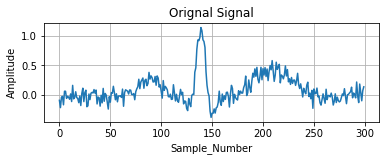

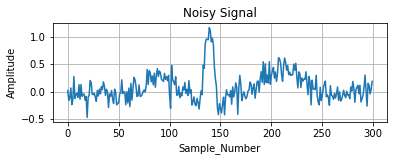

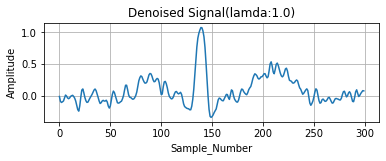

Highest SNR value acheieved for lamda at 1.0 for 3rd order derivative is: 9.51624345228211


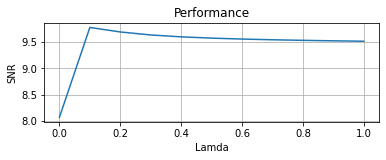

In [11]:
data3=np.array([1,-3,3,-1])
diags3=np.array([0,1,2,3])
D_3=spdiags(data3,diags3,shape=(N-2,N)).toarray()
print("First five corner of third-order derivative matrix is:\n",D_3[:5,:5]) 
List1=Performance_SNR(D_3)
print("Highest SNR value acheieved for lamda at 1.0 for 3rd order derivative is:",List1[10])

<p style="font-family:Georgia"><B style ="font-family:Arial">Q4.</B> Generate the signal with the noise uisng the following lines of matlab code.</p>
<P>
<B>
t=linspace(0,100,1000);
x=sin(2*pi*50*t);
plot(t,x);
grid('on');  
xn=x+0.05*randn(1,1000);</B>
</P>
<p>
Identify the parameter to change the noise level of the signal. Increase the noise level of the signal.
Repeat the experiment mentioned in Q.No.1 for the current noise level and the higher noise level
you opted. Report your observations..
</p>

<p>
    
<B>Justification:</B>
    <li>By increasing the noise level of the signal, PSNR and SNR shoots up.Hence, PSNR and SNR values are relatively high compared to before.</li>
    <li>PSNR value increased from 0.0086 to 25DB.</li>
</p>

In [16]:
t=np.linspace(0,100,1000)
x=np.sin(2*(np.pi)*50*t)
alpha=0.05
xn=x+alpha*randn(1000)
Orignal_Signal=x
Noisy_Signal=xn
N=len(Orignal_Signal)
data=np.array([1,-2,1])
diags=np.array([0,1,2])
D_2=spdiags(data,diags,shape=(N-2,N)).toarray()

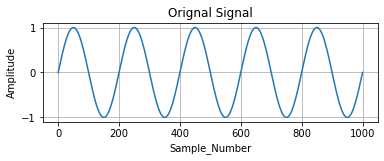

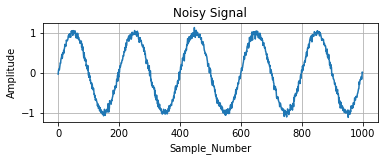

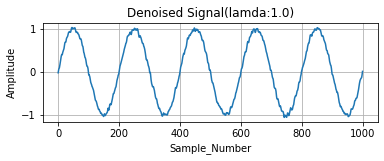

Highest SNR value acheieved for lamda at 1.0 for 2nd order derivative is: 28.32447843422087


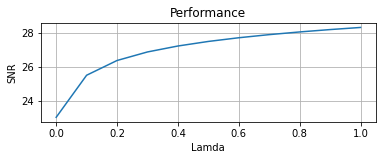

In [17]:
List1=Performance_SNR(D_2)
print("Highest SNR value acheieved for lamda at 1.0 for 2nd order derivative is:",List1[10])

<p>Increasing the noise level of the signal by changing the value of control parameter <B>alpha</B> from 0.05 to 0.09

In [18]:
alpha=0.09
xn=x+alpha*randn(1000)
Orignal_Signal=x
Noisy_Signal=xn

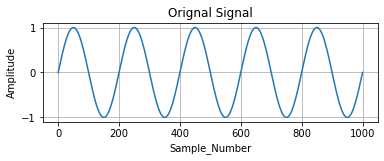

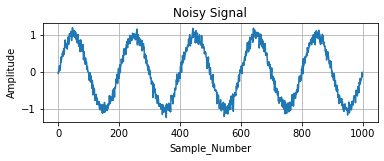

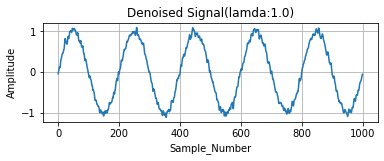

Highest SNR value acheieved for lamda at 1.0 for 2nd order derivative is: 23.443480577529797


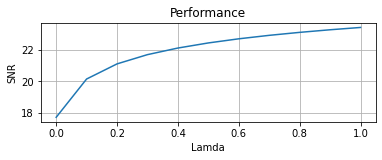

In [19]:
List2=Performance_SNR(D_2)
print("Highest SNR value acheieved for lamda at 1.0 for 2nd order derivative is:",List2[10])

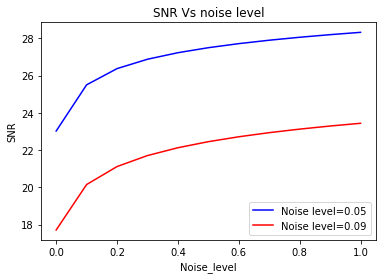

In [20]:
L=np.arange(0.0,1.1,0.1)
plt.figure()
plt.title('SNR Vs noise level')
plt.xlabel('Noise_level')
plt.ylabel('SNR')
plt.plot(L,List1,'b')
plt.plot(L,List2,'r')
plt.legend(['Noise level=0.05','Noise level=0.09'])

<p><B> NOTE:</B>Its visible from the above plots that SNR decreases with increasing noise level.Its dependent on the derivative and the lamda values which are same here</p>As lamda is responsible for smoothening the signal and derivative is responsible for retaining the energy of the signal,increased amount of noise in the signal results in SNR drop indicating that there is more unwanted noise than the actual information.Hence, SNR value should be high for <B>information gain</B>.</p>